<h1>Comparing vocoid heatmaps for different languages</h1>
I'd like to make sure that there is a noticeable difference in the vocoid heatmap that is produced when similar speakers speak in different languages. Different speakers even from the same language may have different patterns, but I'd like to verify this. I'll be using a recording of a female newscaster (taken from YouTube); the quality is better than some YouTube videos, but there is still background sound.

In [1]:
import pandas as pd
import numpy as np
import csv

# import matplotlib, start looking at data?
%matplotlib inline
import matplotlib.pyplot as plt

# INFO HERE: https://python-graph-gallery.com/85-density-plot-with-matplotlib/
from scipy.stats import kde

from scipy.spatial import ConvexHull

<h2> Getting the data</h2>
Read in the formant data from CSV files into two NumPy arrays.

In [2]:
newscast_formants = pd.read_csv("newscaster-female-test_voiced.txt", sep='\t')

In [3]:
newscast_formants

,time(s),nformants,F1(Hz),F2(Hz),F3(Hz),F4(Hz),F5(Hz)
0,0.026117,4,735.525,1911.561,2702.154,4022.562,--undefined--
1,0.031117,4,743.498,1906.866,2651.484,3907.113,--undefined--
2,0.036117,4,752.170,1898.163,2589.586,3927.364,--undefined--
3,0.041117,4,756.473,1891.447,2593.413,3917.371,--undefined--
4,0.046117,4,749.706,1884.615,2634.261,3648.837,--undefined--
...,...,...,...,...,...,...,...
27685,138.451117,5,934.055,1268.517,3022.662,4288.766,4916.349
27686,138.456117,4,933.657,1248.228,3085.112,4385.054,--undefined--
27687,138.461117,5,932.239,1209.797,2907.218,4113.833,4790.185
27688,138.466117,5,902.479,1215.131,2605.353,3839.126,4796.355


<h2>Normalizing the data</h2>
For comparison, we need to normalize data:

$$F_j^* (n) = \frac{F_j(n) - F_j^{median}}{F_j^{median}} \text{ ,  for  } j = \{1, 2\} \text{ , }n = \{1 ... N\}$$

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5724721/

In [4]:
newscast_formants["F1n"], newscast_formants["F2n"] = (newscast_formants["F1(Hz)"] - newscast_formants["F1(Hz)"].median()) / newscast_formants["F1(Hz)"].median(), (newscast_formants["F2(Hz)"] - newscast_formants["F2(Hz)"].median()) / newscast_formants["F2(Hz)"].median()
newscast_formants

,time(s),nformants,F1(Hz),F2(Hz),F3(Hz),F4(Hz),F5(Hz),F1n,F2n
0,0.026117,4,735.525,1911.561,2702.154,4022.562,--undefined--,0.163480,0.098735
1,0.031117,4,743.498,1906.866,2651.484,3907.113,--undefined--,0.176092,0.096036
2,0.036117,4,752.170,1898.163,2589.586,3927.364,--undefined--,0.189810,0.091034
3,0.041117,4,756.473,1891.447,2593.413,3917.371,--undefined--,0.196617,0.087174
4,0.046117,4,749.706,1884.615,2634.261,3648.837,--undefined--,0.185912,0.083247
...,...,...,...,...,...,...,...,...,...
27685,138.451117,5,934.055,1268.517,3022.662,4288.766,4916.349,0.477522,-0.270877
27686,138.456117,4,933.657,1248.228,3085.112,4385.054,--undefined--,0.476893,-0.282538
27687,138.461117,5,932.239,1209.797,2907.218,4113.833,4790.185,0.474650,-0.304628
27688,138.466117,5,902.479,1215.131,2605.353,3839.126,4796.355,0.427574,-0.301562


<h2>Displaying and comparing</h2>
Let's plot the vowel space density for both samples. Is there a difference that is visible on inspection? If inspection shows no difference, is there a better way to calculate how much difference there might be?

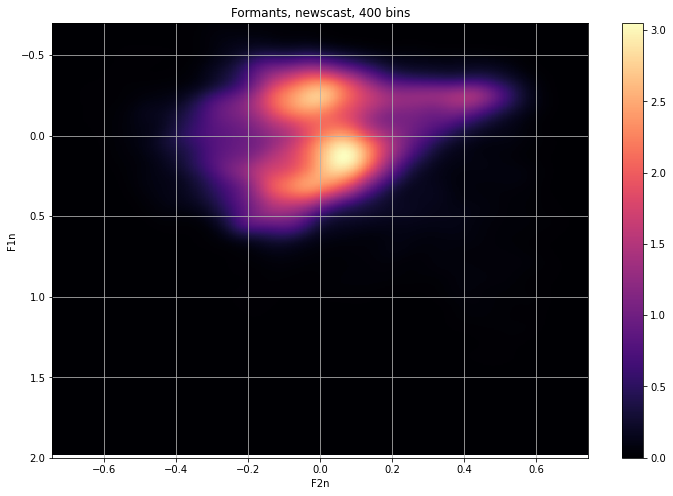

In [9]:
# formants["F2n", "F1n"].plot.kde
fig, ax = plt.subplots()

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=400
k = kde.gaussian_kde([newscast_formants["F2n"],newscast_formants["F1n"]])
xi, yi = np.mgrid[newscast_formants["F2n"].min():newscast_formants["F2n"].max():nbins*1j, newscast_formants["F1n"].min():newscast_formants["F1n"].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.magma)
plt.colorbar()
#plt.show()

# Change color palette
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.show()

# Add color bar
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.colorbar()
#plt.show()

#ax.set_xlim(2600, 400)  # decreasing F2
ax.set_ylim(2.0, -0.7)  # decreasing F1
ax.set(xlabel='F2n', ylabel='F1n',
       title='Formants, newscast, 400 bins')
ax.grid()

plt.rcParams['figure.figsize'] = [12, 8]

#hull = ConvexHull(story1_formants[["F2n","F1n"]])

#for simplex in hull.simplices:
#    plt.plot(story1_formants["F2n"].iloc[simplex], story1_formants["F1n"].iloc[simplex], 'k-')

fig.savefig("arabic_fem_400.png")
plt.show()

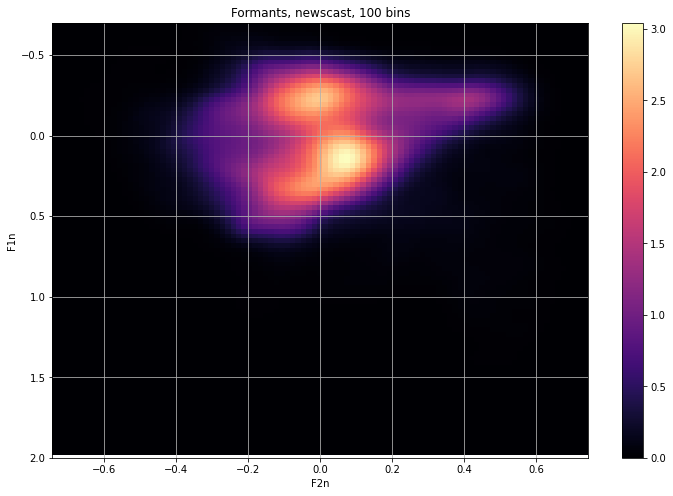

In [12]:
# formants["F2n", "F1n"].plot.kde
fig, ax = plt.subplots()

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=100
k = kde.gaussian_kde([newscast_formants["F2n"],newscast_formants["F1n"]])
xi, yi = np.mgrid[newscast_formants["F2n"].min():newscast_formants["F2n"].max():nbins*1j,
                  newscast_formants["F1n"].min():newscast_formants["F1n"].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.magma)
plt.colorbar()
#plt.show()

# Change color palette
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.show()

# Add color bar
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.colorbar()
#plt.show()

#ax.set_xlim(2600, 400)  # decreasing F2
ax.set_ylim(2.0, -0.7)  # decreasing F1
ax.set(xlabel='F2n', ylabel='F1n',
       title='Formants, newscast, 100 bins')
ax.grid()

plt.rcParams['figure.figsize'] = [12, 8]

#hull = ConvexHull(story1_formants[["F2n","F1n"]])

#for simplex in hull.simplices:
#    plt.plot(story1_formants["F2n"].iloc[simplex], story1_formants["F1n"].iloc[simplex], 'k-')

fig.savefig("arabic_fem_100.png")
plt.show()

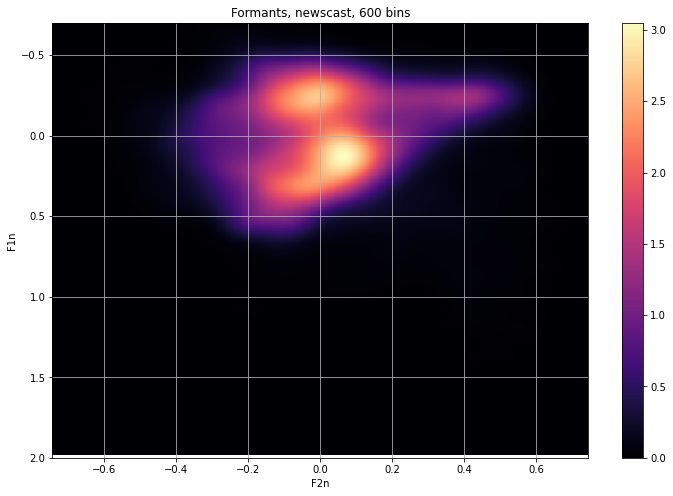

In [10]:
# formants["F2n", "F1n"].plot.kde
fig, ax = plt.subplots()

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=600
k = kde.gaussian_kde([newscast_formants["F2n"],newscast_formants["F1n"]])
xi, yi = np.mgrid[newscast_formants["F2n"].min():newscast_formants["F2n"].max():nbins*1j, newscast_formants["F1n"].min():newscast_formants["F1n"].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.magma)
plt.colorbar()
#plt.show()

# Change color palette
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.show()

# Add color bar
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.colorbar()
#plt.show()

#ax.set_xlim(2600, 400)  # decreasing F2
ax.set_ylim(2.0, -0.7)  # decreasing F1
ax.set(xlabel='F2n', ylabel='F1n',
       title='Formants, newscast, 600 bins')
ax.grid()

plt.rcParams['figure.figsize'] = [12, 8]

#hull = ConvexHull(story1_formants[["F2n","F1n"]])

#for simplex in hull.simplices:
#    plt.plot(story1_formants["F2n"].iloc[simplex], story1_formants["F1n"].iloc[simplex], 'k-')

fig.savefig("arabic_fem_600.png")
plt.show()

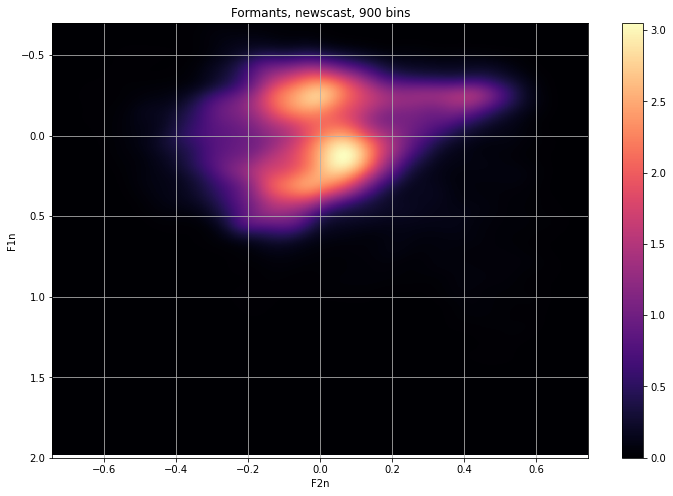

In [11]:
# formants["F2n", "F1n"].plot.kde
fig, ax = plt.subplots()

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=900
k = kde.gaussian_kde([newscast_formants["F2n"],newscast_formants["F1n"]])
xi, yi = np.mgrid[newscast_formants["F2n"].min():newscast_formants["F2n"].max():nbins*1j, newscast_formants["F1n"].min():newscast_formants["F1n"].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.magma)
plt.colorbar()
#plt.show()

# Change color palette
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.show()

# Add color bar
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.colorbar()
#plt.show()

#ax.set_xlim(2600, 400)  # decreasing F2
ax.set_ylim(2.0, -0.7)  # decreasing F1
ax.set(xlabel='F2n', ylabel='F1n',
       title='Formants, newscast, 900 bins')
ax.grid()

plt.rcParams['figure.figsize'] = [12, 8]

#hull = ConvexHull(story1_formants[["F2n","F1n"]])

#for simplex in hull.simplices:
#    plt.plot(story1_formants["F2n"].iloc[simplex], story1_formants["F1n"].iloc[simplex], 'k-')

fig.savefig("arabic_fem_900.png")
plt.show()

In [ ]:
# formants["F2n", "F1n"].plot.kde
fig, ax = plt.subplots()

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=1600
k = kde.gaussian_kde([newscast_formants["F2n"],newscast_formants["F1n"]])
xi, yi = np.mgrid[newscast_formants["F2n"].min():newscast_formants["F2n"].max():nbins*1j, newscast_formants["F1n"].min():newscast_formants["F1n"].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.magma)
plt.colorbar()
#plt.show()

# Change color palette
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.show()

# Add color bar
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.colorbar()
#plt.show()

#ax.set_xlim(2600, 400)  # decreasing F2
ax.set_ylim(2.0, -0.7)  # decreasing F1
ax.set(xlabel='F2n', ylabel='F1n',
       title='Formants, newscast, 1600 bins')
ax.grid()

plt.rcParams['figure.figsize'] = [12, 8]

#hull = ConvexHull(story1_formants[["F2n","F1n"]])

#for simplex in hull.simplices:
#    plt.plot(story1_formants["F2n"].iloc[simplex], story1_formants["F1n"].iloc[simplex], 'k-')

fig.savefig("arabic_fem_1600.png")
plt.show()

In [ ]:
# formants["F2n", "F1n"].plot.kde
fig, ax = plt.subplots()

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=2500
k = kde.gaussian_kde([newscast_formants["F2n"],newscast_formants["F1n"]])
xi, yi = np.mgrid[newscast_formants["F2n"].min():newscast_formants["F2n"].max():nbins*1j, newscast_formants["F1n"].min():newscast_formants["F1n"].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.magma)
plt.colorbar()
#plt.show()

# Change color palette
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.show()

# Add color bar
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.colorbar()
#plt.show()

#ax.set_xlim(2600, 400)  # decreasing F2
ax.set_ylim(2.0, -0.7)  # decreasing F1
ax.set(xlabel='F2n', ylabel='F1n',
       title='Formants, newscast, 2500 bins')
ax.grid()

plt.rcParams['figure.figsize'] = [12, 8]

#hull = ConvexHull(story1_formants[["F2n","F1n"]])

#for simplex in hull.simplices:
#    plt.plot(story1_formants["F2n"].iloc[simplex], story1_formants["F1n"].iloc[simplex], 'k-')

fig.savefig("arabic_fem_2500.png")
plt.show()

In [ ]:
# formants["F2n", "F1n"].plot.kde
fig, ax = plt.subplots()

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=3600
k = kde.gaussian_kde([newscast_formants["F2n"],newscast_formants["F1n"]])
xi, yi = np.mgrid[newscast_formants["F2n"].min():newscast_formants["F2n"].max():nbins*1j, newscast_formants["F1n"].min():newscast_formants["F1n"].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.magma)
plt.colorbar()
#plt.show()

# Change color palette
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.show()

# Add color bar
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.colorbar()
#plt.show()

#ax.set_xlim(2600, 400)  # decreasing F2
ax.set_ylim(2.0, -0.7)  # decreasing F1
ax.set(xlabel='F2n', ylabel='F1n',
       title='Formants, newscast, 3600 bins')
ax.grid()

plt.rcParams['figure.figsize'] = [12, 8]

#hull = ConvexHull(story1_formants[["F2n","F1n"]])

#for simplex in hull.simplices:
#    plt.plot(story1_formants["F2n"].iloc[simplex], story1_formants["F1n"].iloc[simplex], 'k-')

fig.savefig("arabic_fem_3600.png")
plt.show()

In [ ]:
# formants["F2n", "F1n"].plot.kde
fig, ax = plt.subplots()

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=4900
k = kde.gaussian_kde([newscast_formants["F2n"],newscast_formants["F1n"]])
xi, yi = np.mgrid[newscast_formants["F2n"].min():newscast_formants["F2n"].max():nbins*1j, newscast_formants["F1n"].min():newscast_formants["F1n"].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.magma)
plt.colorbar()
#plt.show()

# Change color palette
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.show()

# Add color bar
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.colorbar()
#plt.show()

#ax.set_xlim(2600, 400)  # decreasing F2
ax.set_ylim(2.0, -0.7)  # decreasing F1
ax.set(xlabel='F2n', ylabel='F1n',
       title='Formants, newscast, 4900 bins')
ax.grid()

plt.rcParams['figure.figsize'] = [12, 8]

#hull = ConvexHull(story1_formants[["F2n","F1n"]])

#for simplex in hull.simplices:
#    plt.plot(story1_formants["F2n"].iloc[simplex], story1_formants["F1n"].iloc[simplex], 'k-')

fig.savefig("arabic_fem_4900.png")
plt.show()

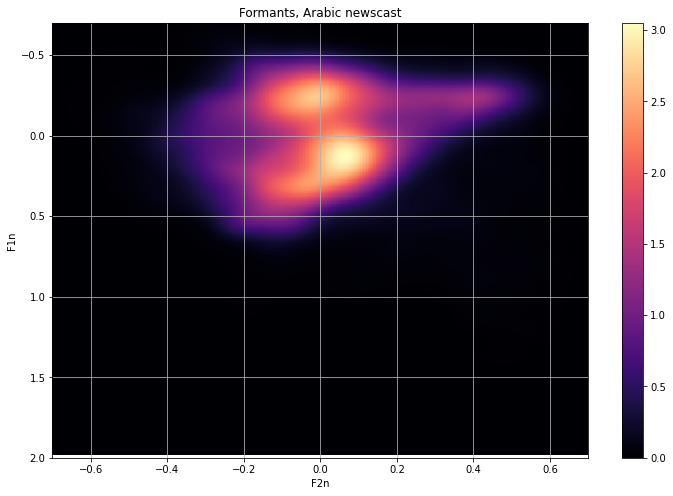

In [14]:
# formants["F2n", "F1n"].plot.kde
fig, ax = plt.subplots()

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=400
k = kde.gaussian_kde([newscast_formants["F2n"],newscast_formants["F1n"]])
xi, yi = np.mgrid[newscast_formants["F2n"].min():newscast_formants["F2n"].max():nbins*1j,
                  newscast_formants["F1n"].min():newscast_formants["F1n"].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.magma)
plt.colorbar()
#plt.show()

# Change color palette
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.show()

# Add color bar
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.colorbar()
#plt.show()

#ax.set_xlim(2600, 400)  # decreasing F2
ax.set_ylim(2.0, -0.7)  # decreasing F1
ax.set_xlim(-0.7, 0.7)
ax.set(xlabel='F2n', ylabel='F1n',
       title='Formants, Arabic newscast')
ax.grid()

plt.rcParams['figure.figsize'] = [12, 8]

#hull = ConvexHull(story1_formants[["F2n","F1n"]])

#for simplex in hull.simplices:
#    plt.plot(story1_formants["F2n"].iloc[simplex], story1_formants["F1n"].iloc[simplex], 'k-')

fig.savefig("arabic_fem.png")
plt.show()